In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import datetime
import os
import seaborn as sns


In [4]:
df = pd.read_csv("./data/2021-09-30_merged_continent_.csv")
df['대륙'].unique()

array(['북미', '아시아', '중남미', '유럽', '중동', '아프리카', '오세아니아'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   한글표기       139 non-null    object 
 1   위중증_합계     109 non-null    float64
 2   위중증1일      49 non-null     float64
 3   치명(%)      139 non-null    object 
 4   완치(%)      136 non-null    float64
 5   발생률        139 non-null    int64  
 6   인구수        139 non-null    int64  
 7   확진자_합계     139 non-null    int64  
 8   확진자1일      119 non-null    float64
 9   사망자_합계     139 non-null    int64  
 10  사망자1일      96 non-null     float64
 11  완치_합계      103 non-null    float64
 12  완치1일       103 non-null    float64
 13  kr_code    139 non-null    object 
 14  en_code    139 non-null    object 
 15  백신보유량      139 non-null    float64
 16  인구당_백신보유율  139 non-null    float64
 17  1차접종       139 non-null    float64
 18  2차접종       139 non-null    float64
 19  일별접종수      139 non-null    float64
 20  국가코드      

In [6]:
continent = df.groupby("대륙")
continent.size()

대륙
북미        2
아시아      27
아프리카     27
오세아니아     4
유럽       37
중남미      25
중동       17
dtype: int64

In [7]:
df.loc[df["대륙"] == "북미"]

,한글표기,위중증_합계,위중증1일,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자_합계,...,완치1일,kr_code,en_code,백신보유량,인구당_백신보유율,1차접종,2차접종,일별접종수,국가코드,대륙
0,미국,21296.0,-523.0,1.6,76.1,133532,331002651,44055692,113357.0,711222,...,126125.0,미국,U.S.,391992670.0,61.2,64.5,55.9,706771.0,US,북미
23,캐나다,776.0,138.0,1.7,95.5,42926,37742154,1615859,3428.0,27754,...,5048.0,캐나다,Canada,56108840.0,74.8,76.2,70.6,99712.0,CA,북미


In [8]:
df.loc[df["대륙"] == "중남미"].shape

(25, 22)

In [9]:
df.loc[df["국가코드"].isnull() , :]

,한글표기,위중증_합계,위중증1일,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자_합계,...,완치1일,kr_code,en_code,백신보유량,인구당_백신보유율,1차접종,2차접종,일별접종수,국가코드,대륙
87,나미비아,18.0,2.0,2.7,96.3,50176,2540905,127493,120.0,3494,...,35.0,나미비아,Namibia,407502.0,8.3,10.5,6.5,4761.0,NaN,아프리카


In [10]:
# 나미비아 국가코드 업데이트
df.loc[df.한글표기 == '나미비아', ('국가코드')] = "NA"
df.loc[df.한글표기 == '나미비아']

,한글표기,위중증_합계,위중증1일,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자_합계,...,완치1일,kr_code,en_code,백신보유량,인구당_백신보유율,1차접종,2차접종,일별접종수,국가코드,대륙
87,나미비아,18.0,2.0,2.7,96.3,50176,2540905,127493,120.0,3494,...,35.0,나미비아,Namibia,407502.0,8.3,10.5,6.5,4761.0,NA,아프리카


In [11]:
# 데이터 결측치 체크
df.isnull().sum()

한글표기          0
위중증_합계       30
위중증1일        90
치명(%)         0
완치(%)         3
발생률           0
인구수           0
확진자_합계        0
확진자1일        20
사망자_합계        0
사망자1일        43
완치_합계        36
완치1일         36
kr_code       0
en_code       0
백신보유량         0
인구당_백신보유율     0
1차접종          0
2차접종          0
일별접종수         0
국가코드          0
대륙            0
dtype: int64

In [12]:
df.loc[df["국가코드"].isnull() , :]

,한글표기,위중증_합계,위중증1일,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자_합계,...,완치1일,kr_code,en_code,백신보유량,인구당_백신보유율,1차접종,2차접종,일별접종수,국가코드,대륙


In [13]:
# 위중증 합계 , 완치_합계 결측치 처리 - interpolate
df['위중증_합계'] = df['위중증_합계'].astype("float64")
df['위중증_합계'] = df['위중증_합계'].interpolate().round()
# df['위중증_합계'].interpolate()
print(df.loc[df["위중증_합계"].isnull() , :])
# df['위중증_합계']

Empty DataFrame
Columns: [한글표기, 위중증_합계, 위중증1일, 치명(%), 완치(%), 발생률, 인구수, 확진자_합계, 확진자1일, 사망자_합계, 사망자1일, 완치_합계, 완치1일, kr_code, en_code, 백신보유량, 인구당_백신보유율, 1차접종, 2차접종, 일별접종수, 국가코드, 대륙]
Index: []

[0 rows x 22 columns]


In [14]:
df.loc[df["위중증_합계"].isnull() , :]

,한글표기,위중증_합계,위중증1일,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자_합계,...,완치1일,kr_code,en_code,백신보유량,인구당_백신보유율,1차접종,2차접종,일별접종수,국가코드,대륙


In [15]:
# 치명 % 전처리
df["치명(%)"] = df["치명(%)"].replace('-', "")
df["치명(%)"] = df["치명(%)"].interpolate()
df["치명(%)"].isnull().sum()

0

In [16]:
# 위중증1일, 확진자1일 , 사망자1일 , 완치1일 , 완치_합계 전처리
df["위중증1일"] = df["위중증1일"].interpolate().round()
df["확진자1일"] = df["확진자1일"].interpolate().round()
df["사망자1일"] = df["사망자1일"].interpolate().round()
df["완치1일"] = df["완치1일"].interpolate().round()
df["완치(%)"] = df["완치(%)"].interpolate()
df['완치_합계'] = df['완치_합계'].astype("float64")
df["완치_합계"] = df["완치_합계"].interpolate().round()

In [17]:
df["사망자1일"]

0      2103.0
1       129.0
2       818.0
3       167.0
4       239.0
        ...  
134       5.0
135       5.0
136       5.0
137       5.0
138       5.0
Name: 사망자1일, Length: 139, dtype: float64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   한글표기       139 non-null    object 
 1   위중증_합계     139 non-null    float64
 2   위중증1일      139 non-null    float64
 3   치명(%)      139 non-null    object 
 4   완치(%)      139 non-null    float64
 5   발생률        139 non-null    int64  
 6   인구수        139 non-null    int64  
 7   확진자_합계     139 non-null    int64  
 8   확진자1일      139 non-null    float64
 9   사망자_합계     139 non-null    int64  
 10  사망자1일      139 non-null    float64
 11  완치_합계      139 non-null    float64
 12  완치1일       139 non-null    float64
 13  kr_code    139 non-null    object 
 14  en_code    139 non-null    object 
 15  백신보유량      139 non-null    float64
 16  인구당_백신보유율  139 non-null    float64
 17  1차접종       139 non-null    float64
 18  2차접종       139 non-null    float64
 19  일별접종수      139 non-null    float64
 20  국가코드      

In [19]:
df["사망자_합계"]

0      711222
1      447828
2      595520
3      136375
4       63611
        ...  
134        27
135        33
136         3
137         0
138         0
Name: 사망자_합계, Length: 139, dtype: int64

In [20]:
df.isnull().sum()

한글표기         0
위중증_합계       0
위중증1일        0
치명(%)        0
완치(%)        0
발생률          0
인구수          0
확진자_합계       0
확진자1일        0
사망자_합계       0
사망자1일        0
완치_합계        0
완치1일         0
kr_code      0
en_code      0
백신보유량        0
인구당_백신보유율    0
1차접종         0
2차접종         0
일별접종수        0
국가코드         0
대륙           0
dtype: int64

In [21]:
# 완치_합계 체크
df.loc[df["완치_합계"].isnull(), : ]

,한글표기,위중증_합계,위중증1일,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자_합계,...,완치1일,kr_code,en_code,백신보유량,인구당_백신보유율,1차접종,2차접종,일별접종수,국가코드,대륙


In [22]:
# 대륙별 체크
df['대륙'].unique()

array(['북미', '아시아', '중남미', '유럽', '중동', '아프리카', '오세아니아'], dtype=object)

In [23]:
df_AM = df.loc[df["대륙"].str.contains('미', regex=False), :] # 아메리카 대륙
# df_NA = df.loc[df["대륙"] == "북미"]
# df_MA_SA = df.loc[df["대륙"] == "남중미"]
df_EU = df.loc[df["대륙"] == "유럽"]
df_asia = df.loc[df["대륙"] == "아시아"]
df_mid_asia = df.loc[df["대륙"] == "중동"]
df_AF = df.loc[df["대륙"] == "아프리카"]
df_OS = df.loc[df["대륙"] == "오세아니아"]

In [24]:
df_AM  # 아메리카 대륙 확인

,한글표기,위중증_합계,위중증1일,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자_합계,...,완치1일,kr_code,en_code,백신보유량,인구당_백신보유율,1차접종,2차접종,일별접종수,국가코드,대륙
0,미국,21296.0,-523.0,1.6,76.100000,133532,331002651,44055692,113357.0,711222,...,126125.0,미국,U.S.,391992670.0,61.2,64.5,55.9,706771.0,US,북미
2,브라질,8318.0,-206.0,2.8,95.300000,100676,212559417,21381790,15395.0,595520,...,22052.0,브라질,Brazil,234674910.0,56.8,71.5,42.3,1396215.0,BR,중남미
7,아르헨티나,1184.0,-16.0,2.2,97.400000,116278,45195774,5253765,1825.0,115038,...,1481.0,아르헨티나,Argentina,51516132.0,57.3,65.8,48.8,215137.0,AR,중남미
8,콜롬비아,542.0,-41.0,2.5,96.800000,97397,50882891,4954376,1686.0,126219,...,2588.0,콜롬비아,Colombia,39913296.0,39.6,51.5,32.9,175737.0,CO,중남미
13,멕시코,4798.0,-3.0,7.6,82.300000,28351,128932753,3645599,9792.0,276376,...,7337.0,멕시코,Mexico,99868670.0,39.1,49.8,35.2,439355.0,MX,중남미
18,페루,1021.0,-4.0,9.2,92.433333,65975,32971854,2174219,865.0,199329,...,10570.0,페루,Peru,26058662.0,39.3,47.1,31.5,230804.0,PE,중남미
22,칠레,386.0,-3.0,2.3,97.300000,86492,19116201,1653406,611.0,37455,...,423.0,칠레,Chile,31664524.0,82.9,78.8,73.8,90807.0,CL,중남미
23,캐나다,776.0,138.0,1.7,95.500000,42926,37742154,1615859,3428.0,27754,...,5048.0,캐나다,Canada,56108840.0,74.8,76.2,70.6,99712.0,CA,북미
34,쿠바,421.0,15.0,0.8,95.600000,77024,11326616,872425,5617.0,7378,...,7277.0,쿠바,Cuba,20535956.0,90.6,80.8,43.7,254770.0,CU,중남미
45,과테말라,5.0,-2.0,2.4,92.500000,31104,17915568,553289,2956.0,13453,...,3901.0,과테말라,Guatemala,6757605.0,19.2,25.1,13.3,70914.0,GT,중남미


In [25]:
df.columns

Index(['한글표기', '위중증_합계', '위중증1일', '치명(%)', '완치(%)', '발생률', '인구수', '확진자_합계',
       '확진자1일', '사망자_합계', '사망자1일', '완치_합계', '완치1일', 'kr_code', 'en_code',
       '백신보유량', '인구당_백신보유율', '1차접종', '2차접종', '일별접종수', '국가코드', '대륙'],
      dtype='object')

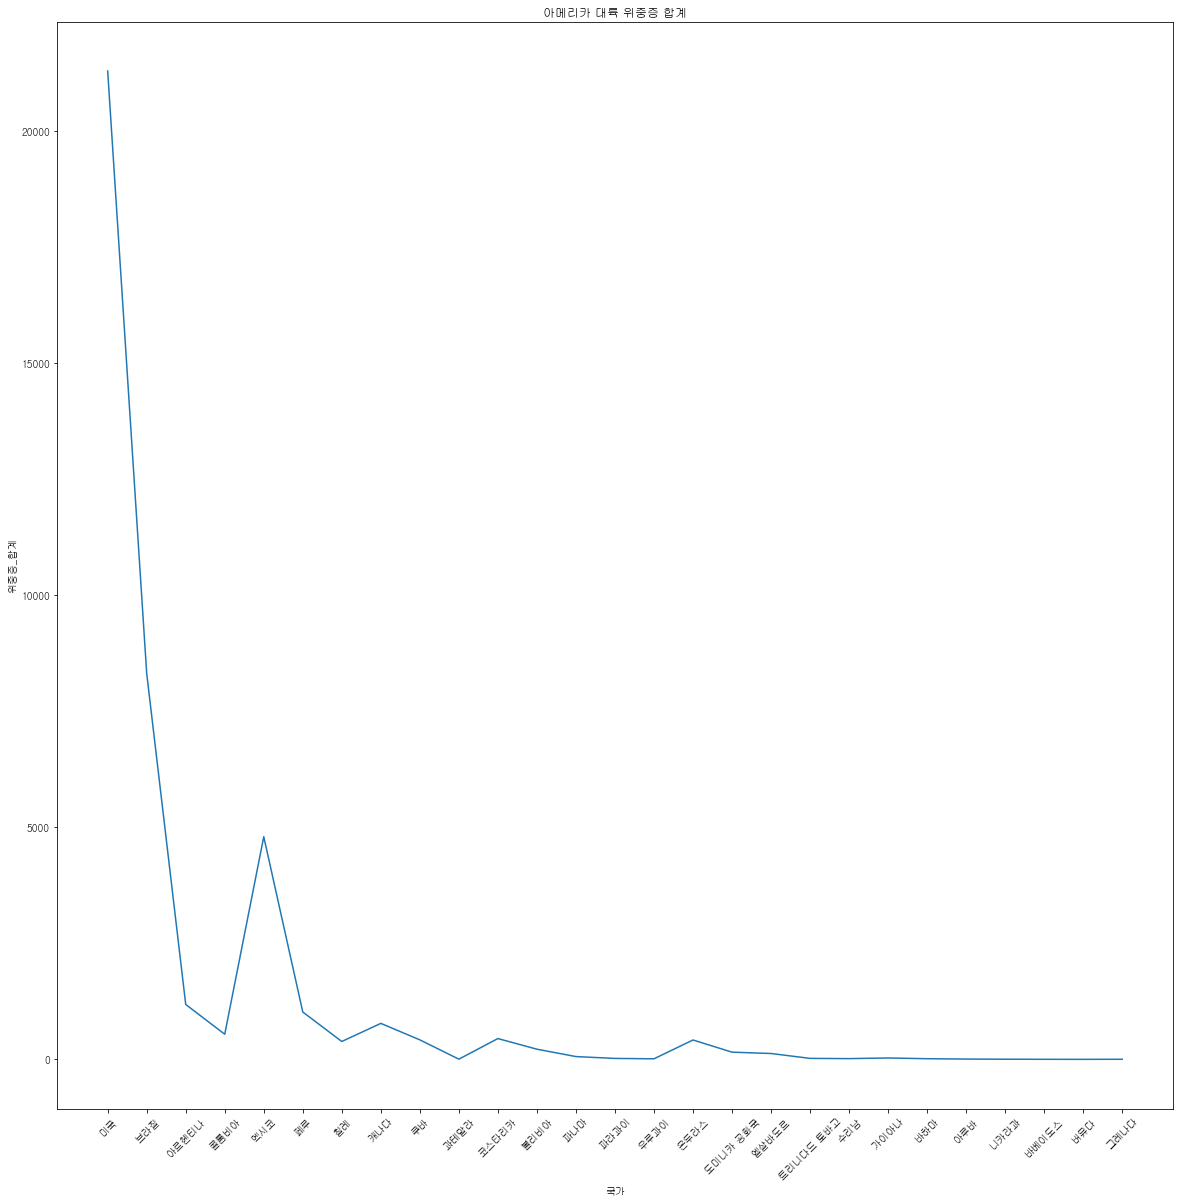

In [26]:
%matplotlib inline
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# plt.rcParams['font.family'] = 'malgun'

fig = plt.figure(figsize=(20,20))
fig.set_facecolor("white")
ax = fig.add_subplot()

ax.plot(df_AM["한글표기"],df_AM["위중증_합계"])
plt.xticks(rotation=45)
plt.xlabel("국가")
plt.ylabel("위중증_합계")
plt.title("아메리카 대륙 위중증 합계")
plt.show()

In [27]:
# 원 그래프 함수화
def draw_pie_chart(df_country_name, title, df_data):
    plt.rcParams["figure.figsize"] = (20,20)
    plt.rc('font', size=15)

    # # 가장 큰 것만 0.1 explode
    # explode = np.zeros(len(df_AM["위중증_합계"]))
    # explode[df_AM["위중증_합계"].argmax()] = 0.1
    # explode=explode

    # 도넛형으로 만들기
    wedgeprops={'width': 0.4, 'edgecolor': 'w', 'linewidth': 5}

    #
    sort_legend = True

    plt.title(title , fontsize=25)

    # plt.pie(df_AM["위중증_합계"], autopct = '%.1f%%', labels = df_AM["한글표기"], startangle=90, wedgeprops=wedgeprops)
    plt.pie(df_data, startangle=90, wedgeprops=wedgeprops)

    labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(df_country_name,
    100.*df_data/df_data.sum())]
    plt.legend(labels, loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=20)
    plt.show()


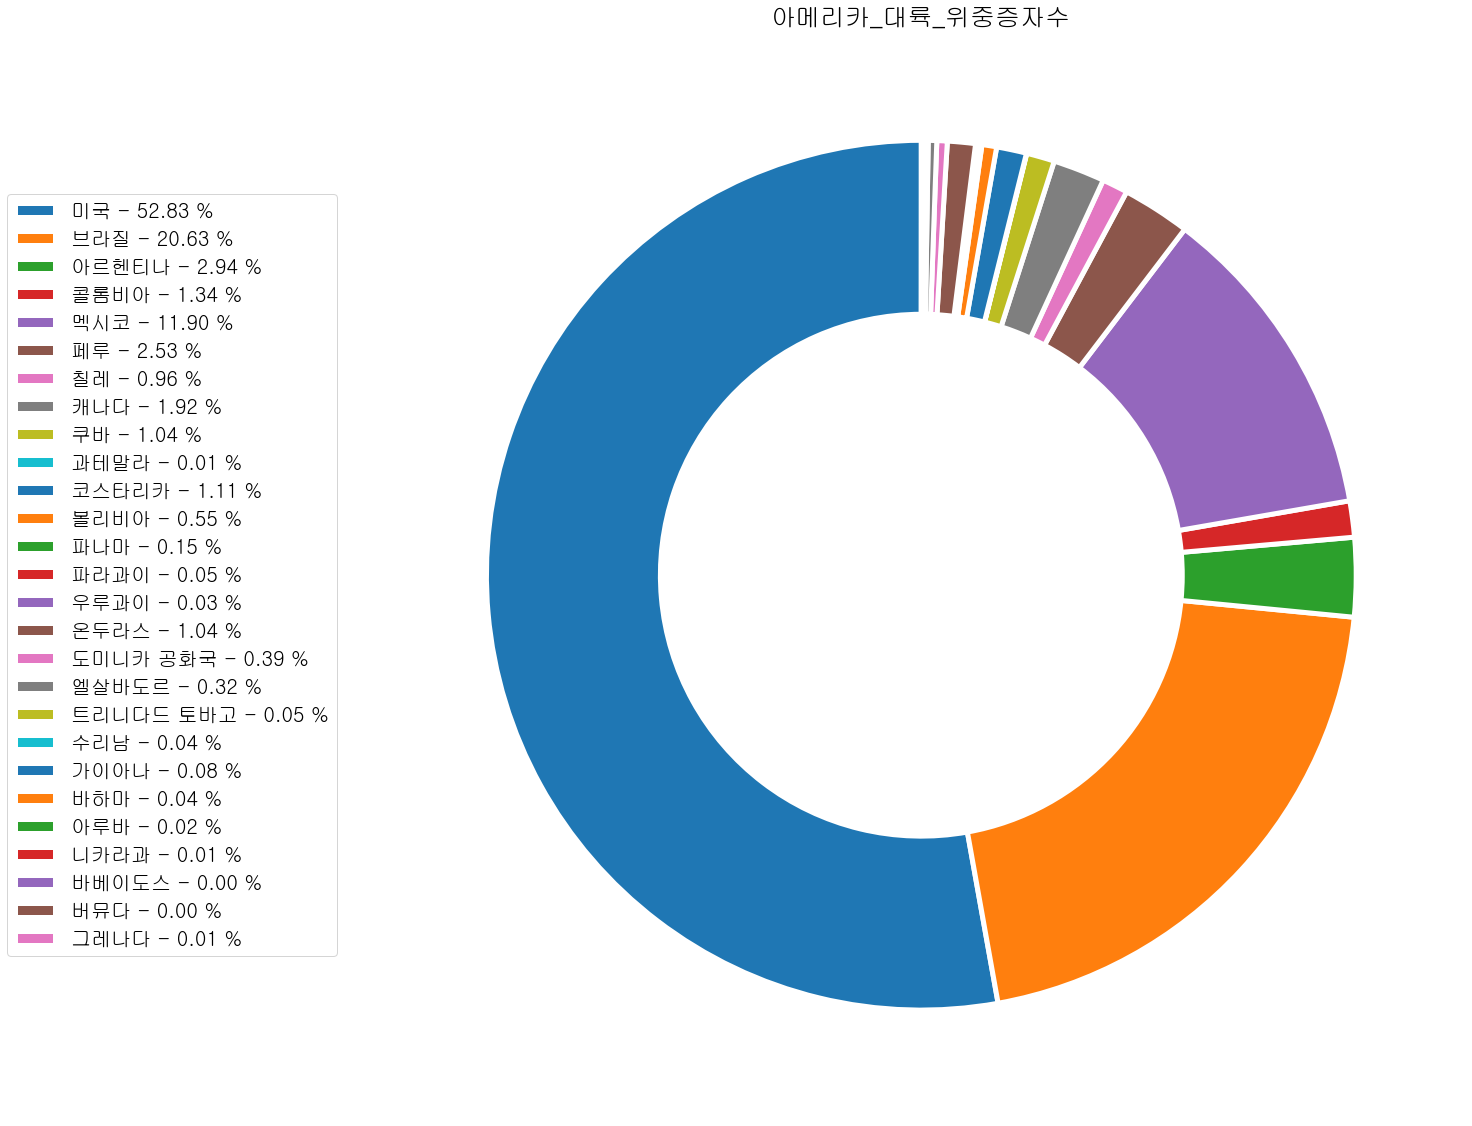

In [28]:
draw_pie_chart(df_AM["한글표기"], "아메리카_대륙_위중증자수", df_AM["위중증_합계"])

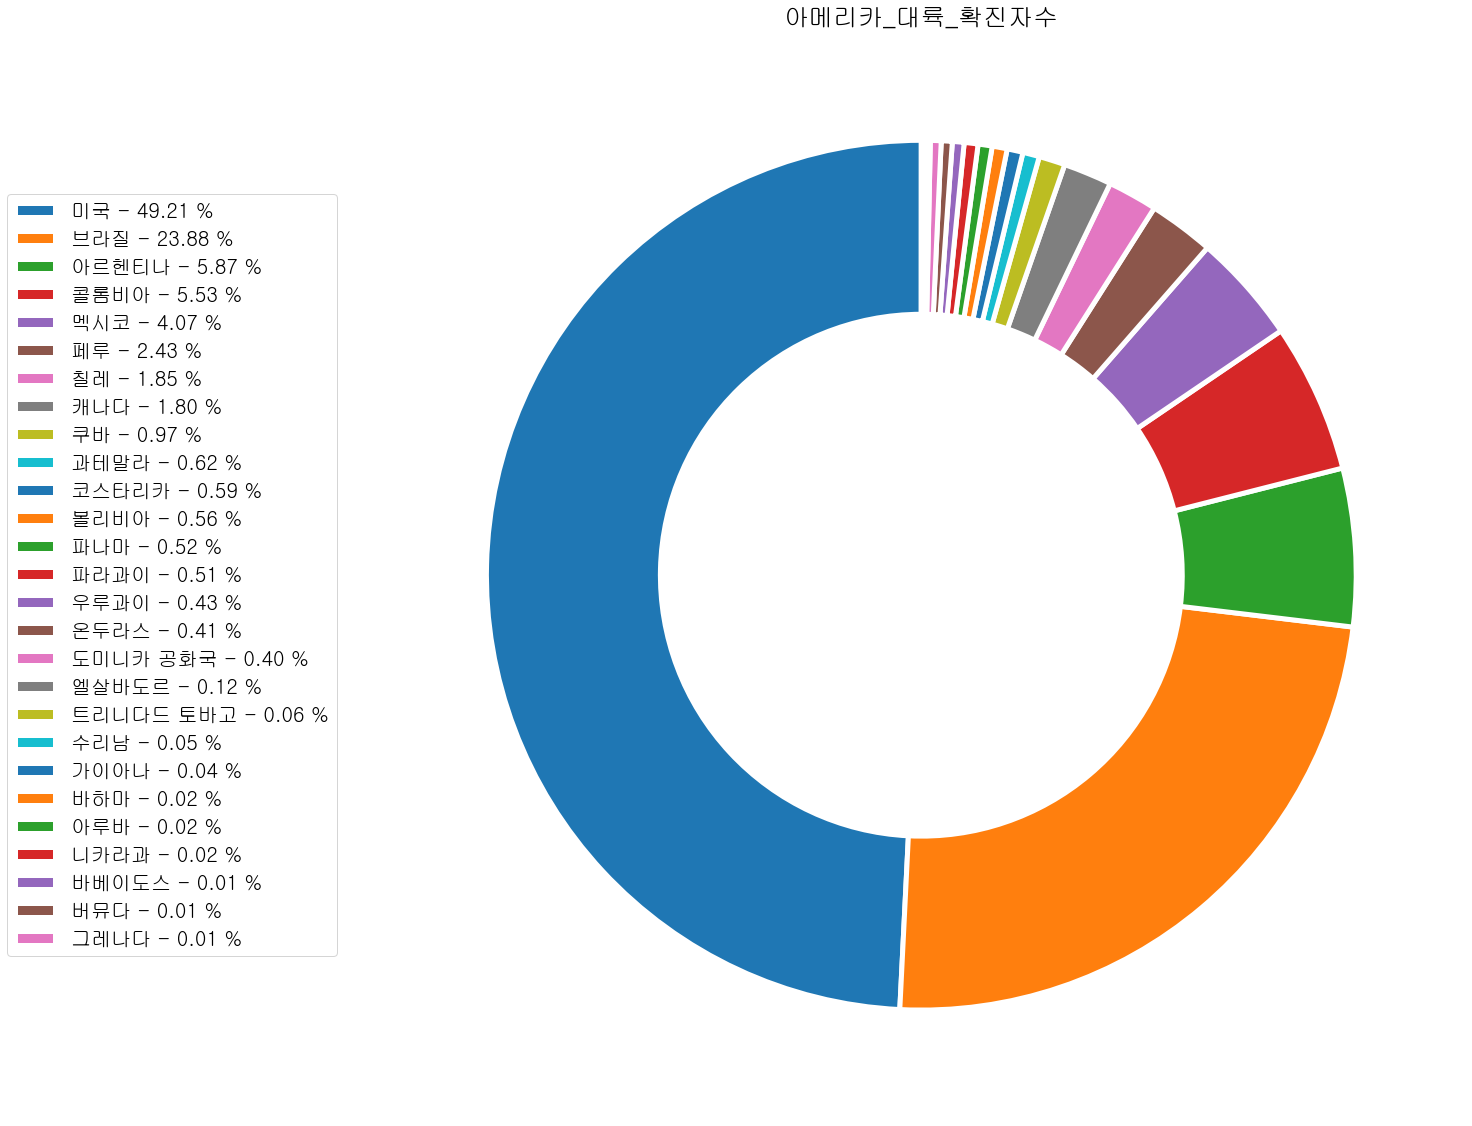

In [29]:
draw_pie_chart(df_AM["한글표기"], "아메리카_대륙_확진자수", df_AM["확진자_합계"])

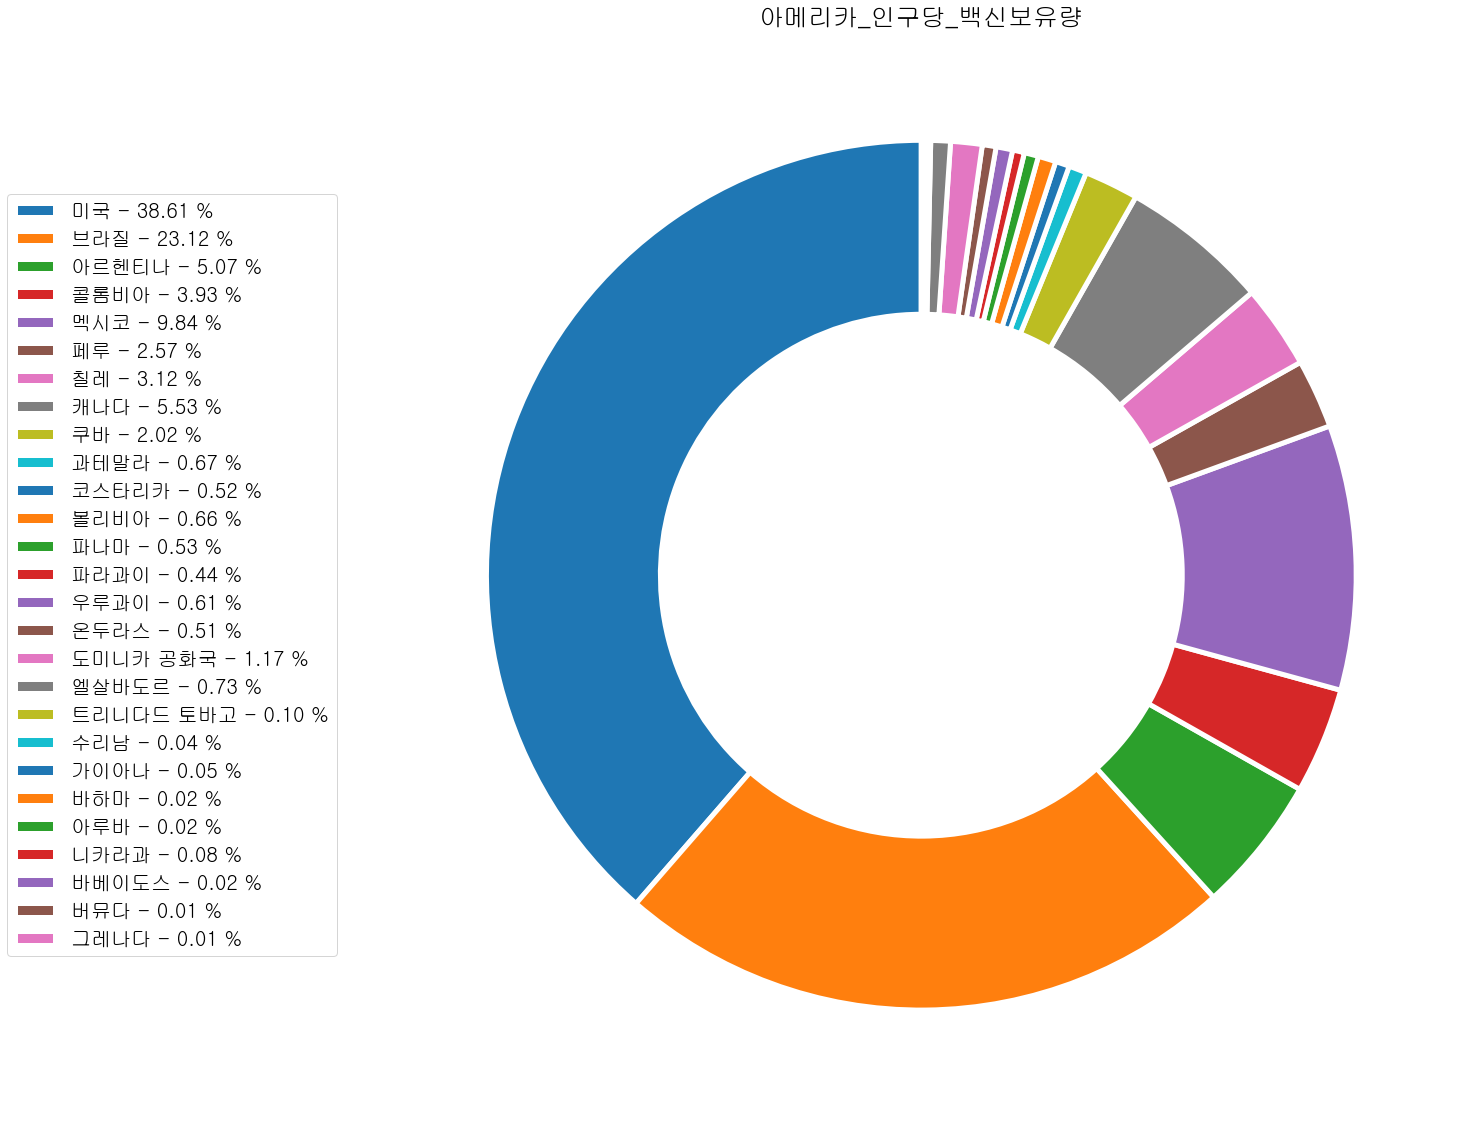

In [30]:
draw_pie_chart(df_AM["한글표기"], "아메리카_인구당_백신보유량", df_AM["백신보유량"])

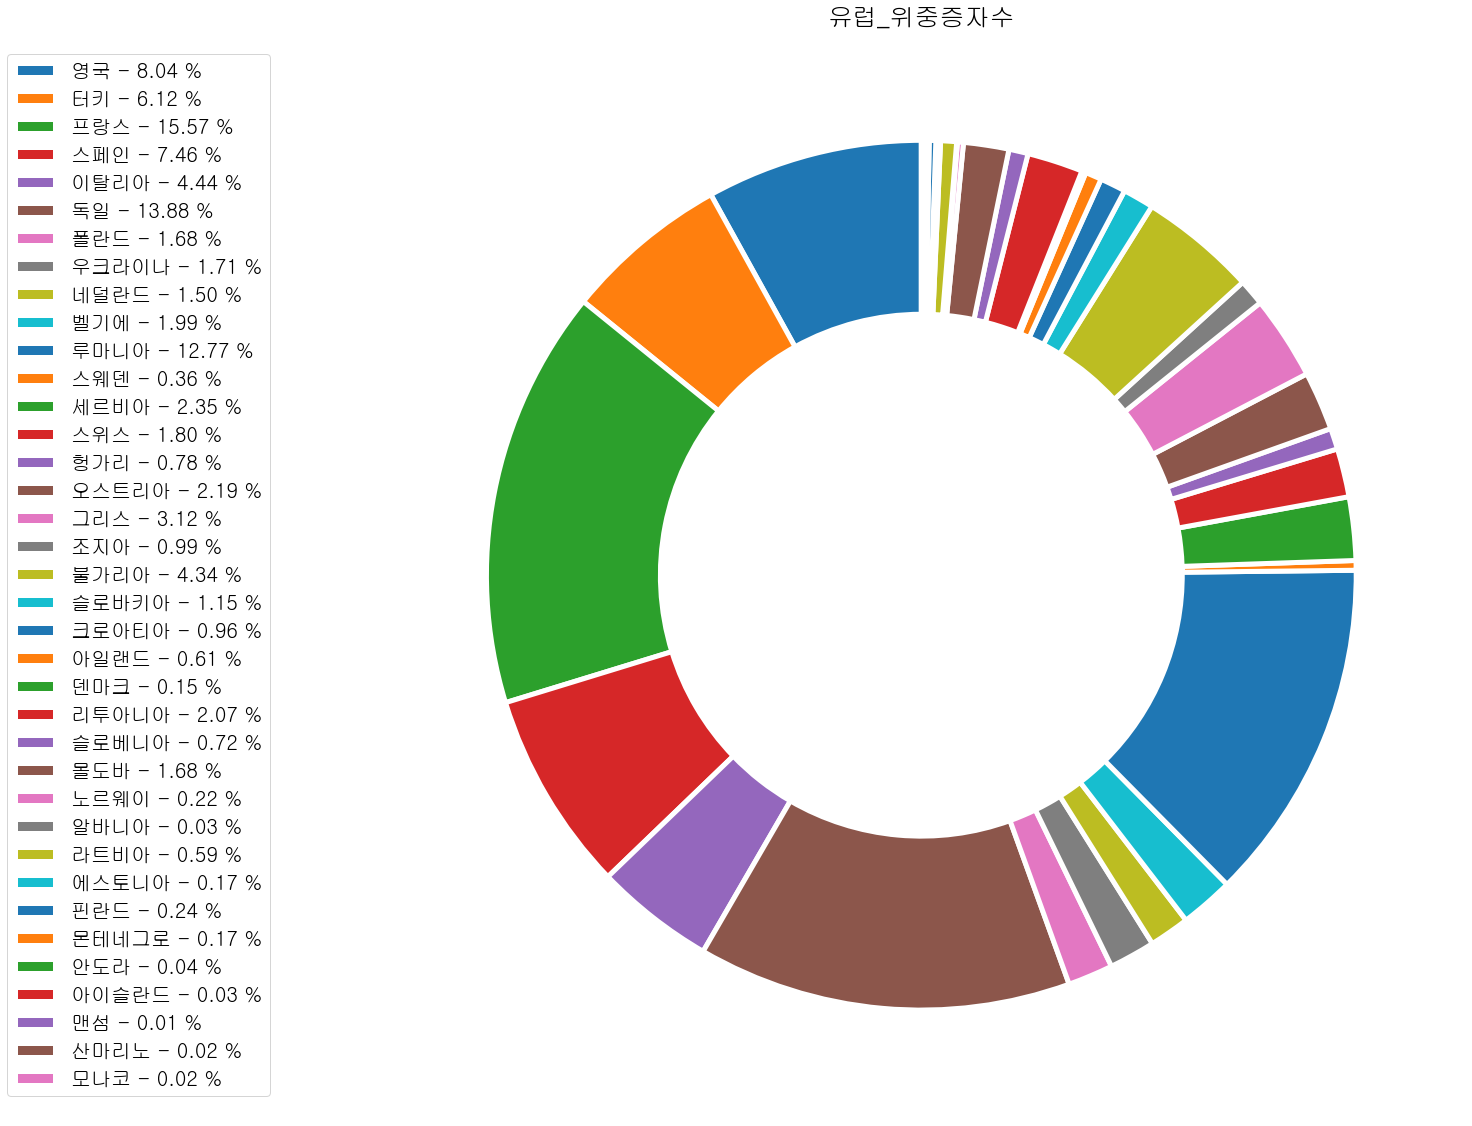

In [31]:
# df_EU = df.loc[df["대륙"] == "유럽"]
# df_asia = df.loc[df["대륙"] == "아시아"]
# df_mid_asia = df.loc[df["대륙"] == "중동"]
# df_AF = df.loc[df["대륙"] == "아프리카"]
# df_OS = df.loc[df["대륙"] == "오세아니아"]

draw_pie_chart(df_EU["한글표기"], "유럽_위중증자수", df_EU["위중증_합계"])

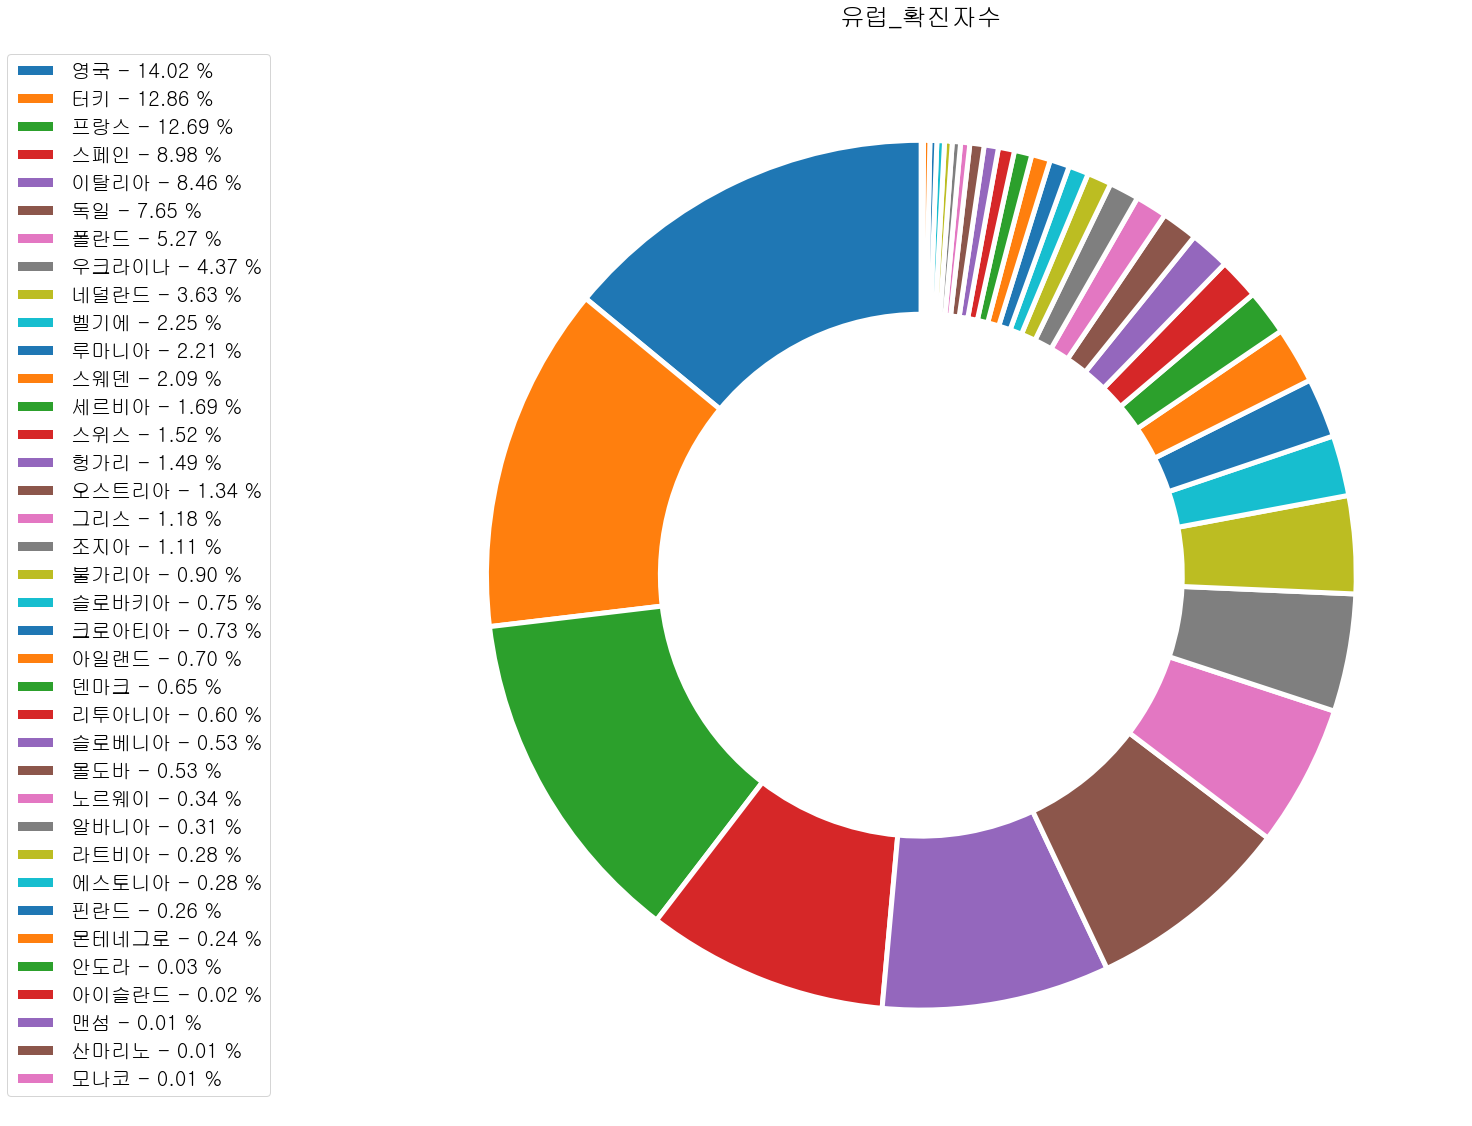

In [32]:
draw_pie_chart(df_EU["한글표기"], "유럽_확진자수", df_EU["확진자_합계"])

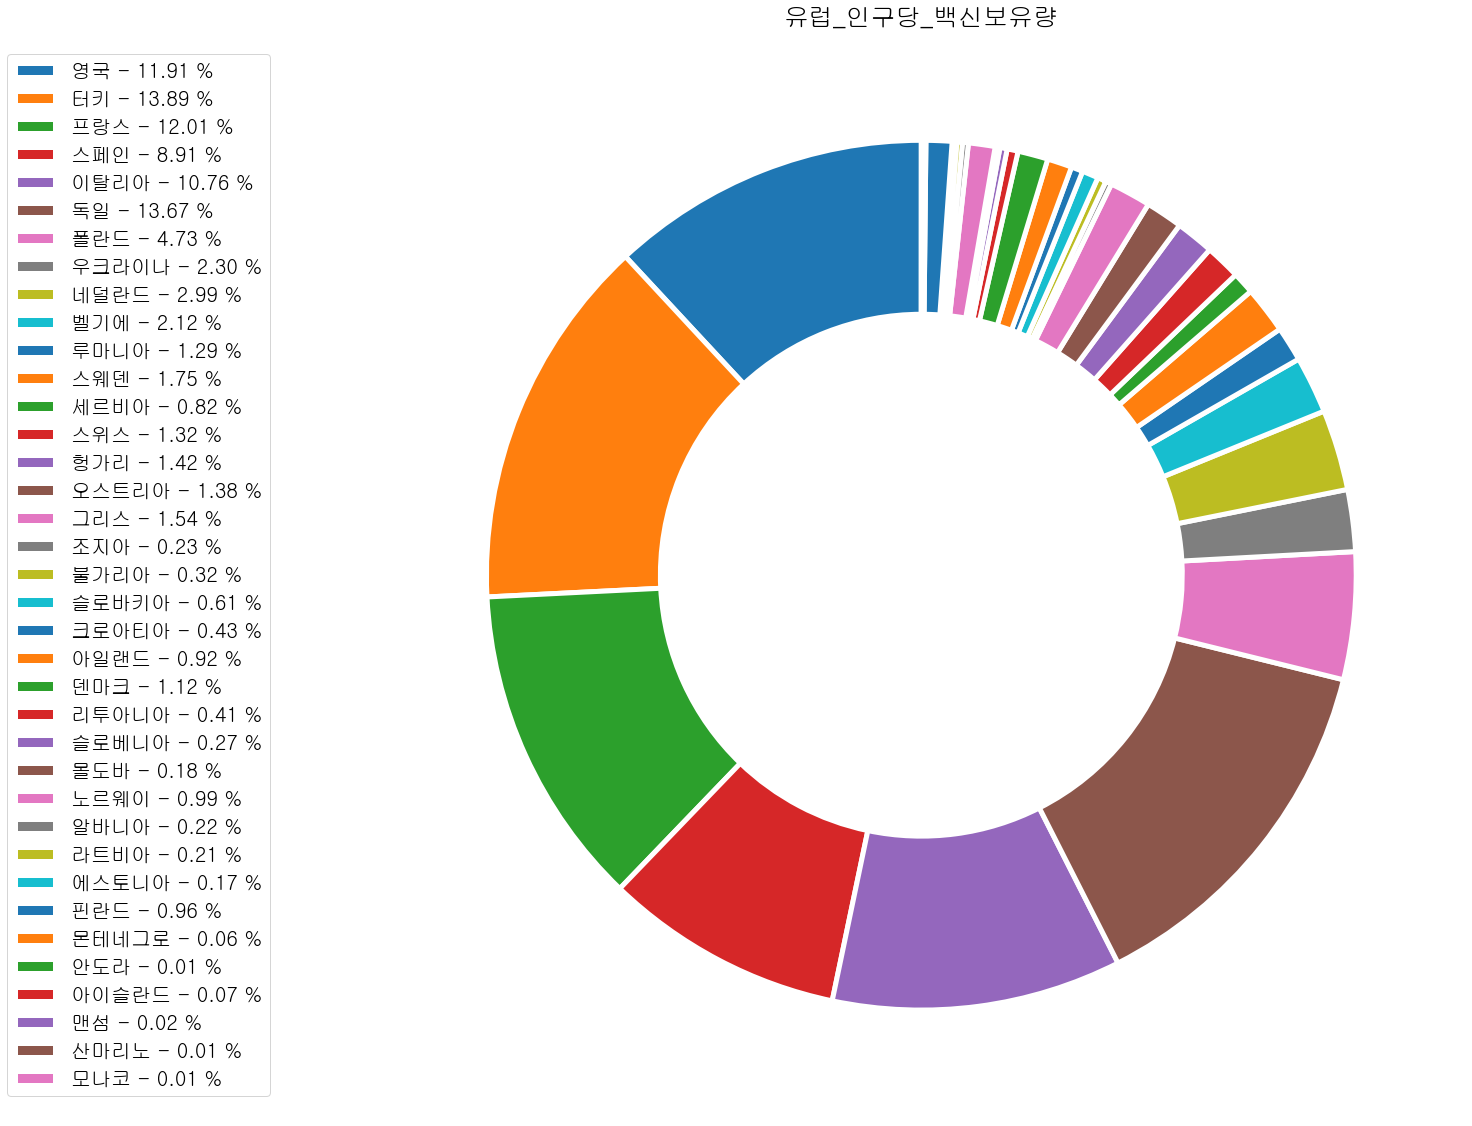

In [33]:
draw_pie_chart(df_EU["한글표기"], "유럽_인구당_백신보유량", df_EU["백신보유량"])

In [34]:
df["2차접종"].dtype

dtype('float64')

In [35]:
df["대륙"].dtype

dtype('O')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   한글표기       139 non-null    object 
 1   위중증_합계     139 non-null    float64
 2   위중증1일      139 non-null    float64
 3   치명(%)      139 non-null    object 
 4   완치(%)      139 non-null    float64
 5   발생률        139 non-null    int64  
 6   인구수        139 non-null    int64  
 7   확진자_합계     139 non-null    int64  
 8   확진자1일      139 non-null    float64
 9   사망자_합계     139 non-null    int64  
 10  사망자1일      139 non-null    float64
 11  완치_합계      139 non-null    float64
 12  완치1일       139 non-null    float64
 13  kr_code    139 non-null    object 
 14  en_code    139 non-null    object 
 15  백신보유량      139 non-null    float64
 16  인구당_백신보유율  139 non-null    float64
 17  1차접종       139 non-null    float64
 18  2차접종       139 non-null    float64
 19  일별접종수      139 non-null    float64
 20  국가코드      

In [37]:
df.columns

Index(['한글표기', '위중증_합계', '위중증1일', '치명(%)', '완치(%)', '발생률', '인구수', '확진자_합계',
       '확진자1일', '사망자_합계', '사망자1일', '완치_합계', '완치1일', 'kr_code', 'en_code',
       '백신보유량', '인구당_백신보유율', '1차접종', '2차접종', '일별접종수', '국가코드', '대륙'],
      dtype='object')

In [38]:
df.head()

,한글표기,위중증_합계,위중증1일,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자_합계,...,완치1일,kr_code,en_code,백신보유량,인구당_백신보유율,1차접종,2차접종,일별접종수,국가코드,대륙
0,미국,21296.0,-523.0,1.6,76.1,133532,331002651,44055692,113357.0,711222,...,126125.0,미국,U.S.,391992670.0,61.2,64.5,55.9,706771.0,US,북미
1,인도,8944.0,-364.0,1.3,97.8,24449,1380004385,33718984,4743.0,447828,...,9420.0,인도,India,883358400.0,32.3,46.9,16.9,7087679.0,IN,아시아
2,브라질,8318.0,-206.0,2.8,95.3,100676,212559417,21381790,15395.0,595520,...,22052.0,브라질,Brazil,234674910.0,56.8,71.5,42.3,1396215.0,BR,중남미
3,영국,831.0,-47.0,1.8,80.9,114476,67886011,7736235,34520.0,136375,...,36239.0,영국,U.K.,93630856.0,70.1,73.1,67.1,63598.0,GB,유럽
4,터키,633.0,-67.0,0.9,92.4,84480,84339067,7095580,28892.0,63611,...,30336.0,터키,Turkey,109164376.0,65.6,64.7,53.3,378499.0,TR,유럽


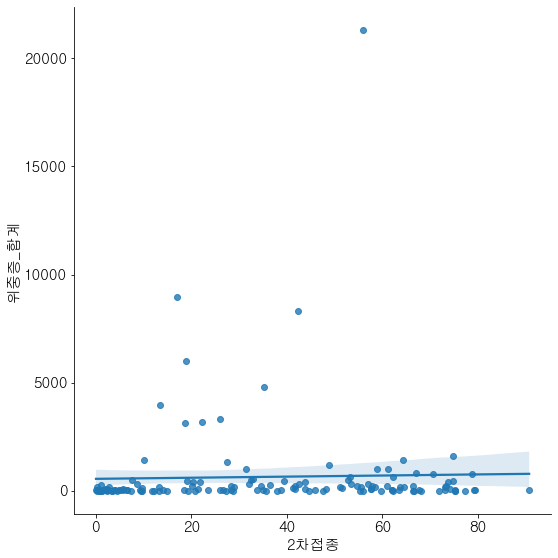

In [42]:
sns.lmplot(x="2차접종", y="위중증_합계", height=8, data=df)

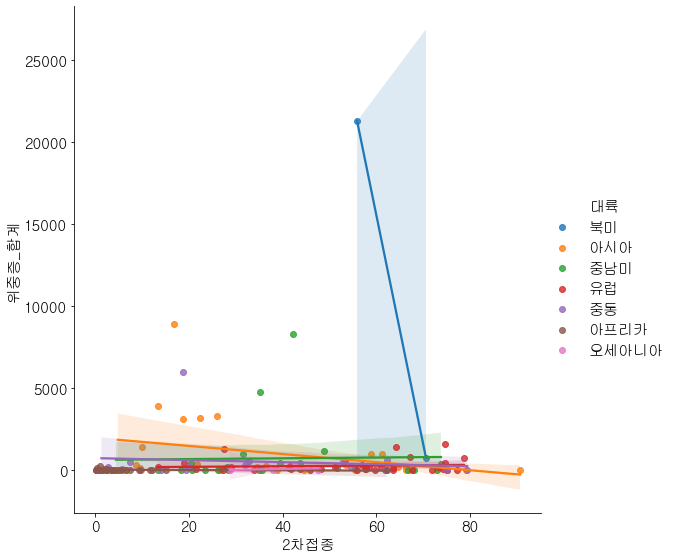

In [43]:
sns.lmplot(x="2차접종", y="위중증_합계", hue="대륙", height=8, data=df)

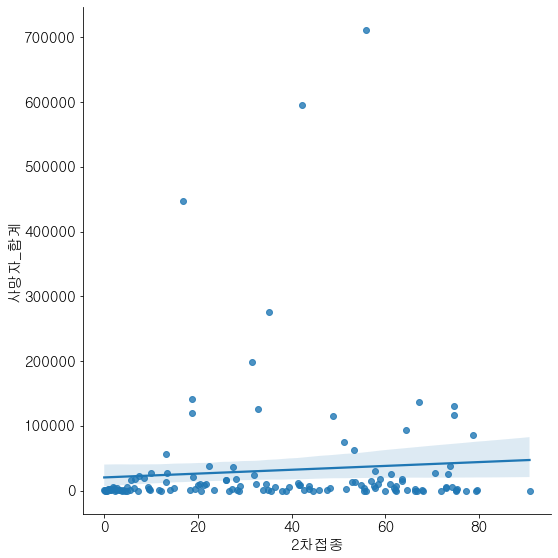

In [44]:
sns.lmplot(x="2차접종", y="사망자_합계", height=8, data=df)

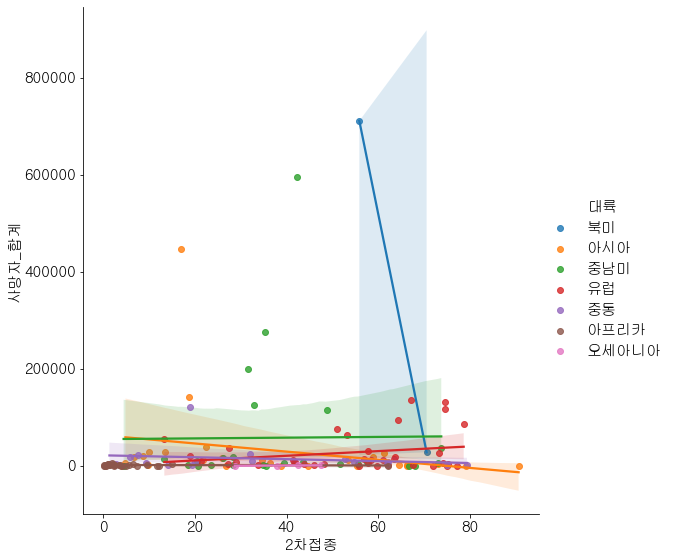

In [45]:
sns.lmplot(x="2차접종", y="사망자_합계", hue="대륙", height=8, data=df)

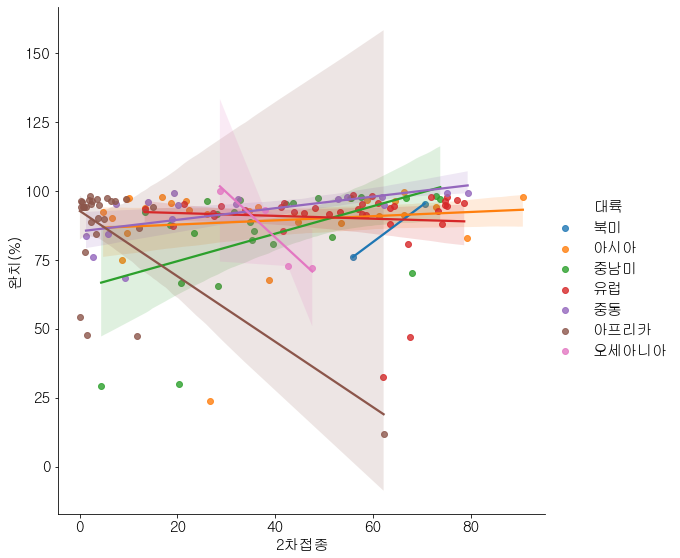

In [46]:
sns.lmplot(x="2차접종", y="완치(%)", hue="대륙", height=8, data=df)

In [47]:
df.loc[df["치명(%)"]=='', :]

,한글표기,위중증_합계,위중증1일,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자_합계,...,완치1일,kr_code,en_code,백신보유량,인구당_백신보유율,1차접종,2차접종,일별접종수,국가코드,대륙
137,마카오,2.0,2.0,,88.7,109,649335,71,1.0,0,...,5.0,마카오,Macau,649564.0,47.8,51.2,44.6,4123.0,MO,아시아
138,사모아,2.0,2.0,,100.0,15,198414,3,1.0,0,...,5.0,사모아,Samoa,172316.0,42.9,57.1,28.7,3269.0,WS,오세아니아


In [48]:
df["치명(%)"].replace('', "0.0")

0      1.6
1      1.3
2      2.8
3      1.8
4      0.9
      ... 
134    0.6
135    1.0
136    0.1
137    0.0
138    0.0
Name: 치명(%), Length: 139, dtype: object

In [49]:
df["치명(%)"].unique()

array(['1.6', '1.3', '2.8', '1.8', '0.9', '1.7', '2.2', '2.5', '3.4',
       '7.6', '2.6', '1.5', '2.3', '1.2', '9.2', '1.1', '1.0', '0.6',
       '2.1', '3.0', '0.8', '3.7', '1.4', '3.5', '2.4', '4.2', '3.8',
       '3.1', '2.7', '0.7', '5.7', '0.4', '0.5', '2.0', '0.3', '2.9',
       '4.8', '0.1', '1.9', '5.6', '5.2', '3.6', '4.9', ''], dtype=object)

In [50]:
df.loc[df["치명(%)"]=='', :]

,한글표기,위중증_합계,위중증1일,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자_합계,...,완치1일,kr_code,en_code,백신보유량,인구당_백신보유율,1차접종,2차접종,일별접종수,국가코드,대륙
137,마카오,2.0,2.0,,88.7,109,649335,71,1.0,0,...,5.0,마카오,Macau,649564.0,47.8,51.2,44.6,4123.0,MO,아시아
138,사모아,2.0,2.0,,100.0,15,198414,3,1.0,0,...,5.0,사모아,Samoa,172316.0,42.9,57.1,28.7,3269.0,WS,오세아니아


In [51]:
df.loc[df.한글표기 == '마카오', ("치명(%)")] = 0
df.loc[df.한글표기 == '사모아', ("치명(%)")] = 0

In [52]:
df["치명(%)"] = df["치명(%)"].astype("float64")
df.loc[df["치명(%)"]==0, :]

,한글표기,위중증_합계,위중증1일,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자_합계,...,완치1일,kr_code,en_code,백신보유량,인구당_백신보유율,1차접종,2차접종,일별접종수,국가코드,대륙
137,마카오,2.0,2.0,0.0,88.7,109,649335,71,1.0,0,...,5.0,마카오,Macau,649564.0,47.8,51.2,44.6,4123.0,MO,아시아
138,사모아,2.0,2.0,0.0,100.0,15,198414,3,1.0,0,...,5.0,사모아,Samoa,172316.0,42.9,57.1,28.7,3269.0,WS,오세아니아


In [53]:
df["치명(%)"].replace("0.0", np.NaN)
df["치명(%)"].interpolate()

0      1.6
1      1.3
2      2.8
3      1.8
4      0.9
      ... 
134    0.6
135    1.0
136    0.1
137    0.0
138    0.0
Name: 치명(%), Length: 139, dtype: float64

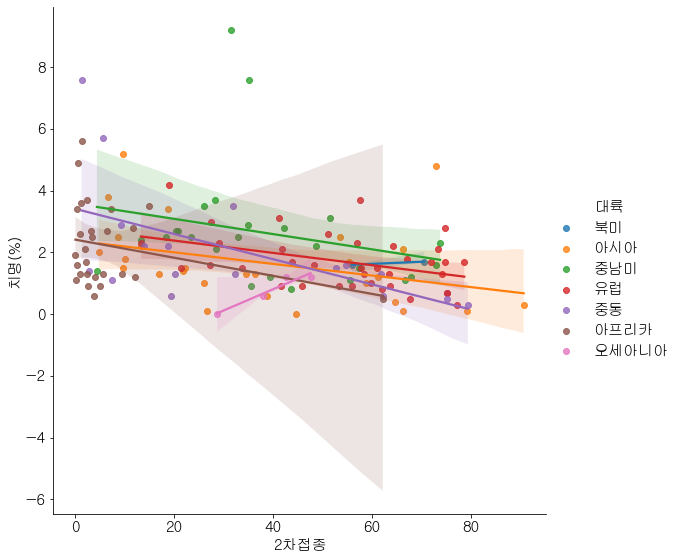

In [54]:
sns.lmplot(x="2차접종", y="치명(%)", hue="대륙", height=8, data=df)

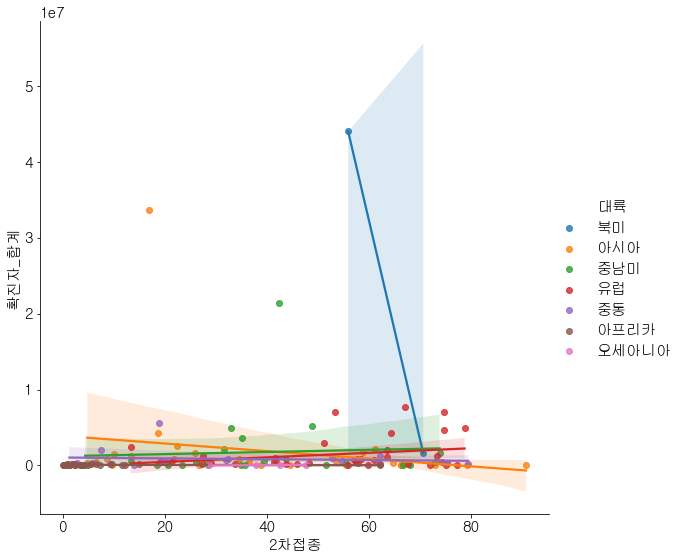

In [55]:
sns.lmplot(x="2차접종", y="확진자_합계", hue="대륙", height=8, data=df)